# Radial Basis Functions


Radial Basis Functions (RBF) are used to approximate a function $f(\boldsymbol{x})$ given $f_i$ function values at $N$ discrete points $\boldsymbol{x}$. The approximation may be as a result of an interpolation or regression of the known function values in any number of input dimensions. The general surrogate model is constructed by treating the observed function values as if generated from the model

\begin{equation}
f_i = \sum_{k=1}^M \beta_k \phi \left( \boldsymbol{x}_i ,\boldsymbol{x}_k\right) + p \left( \boldsymbol{x}_i \right) + \epsilon_i\tag{1}
\end{equation}

with $\beta_k$ the weighting coefficient of the $k^{th}$ basis function evaluation using the kernel or centre $\boldsymbol{x}_k$. The total basis function contribution results out of a summation of the contributions made by each basis function centre. The model may also have an underlying definition with $ p ( \boldsymbol{x}_i )$  a polynomial and uncertainty captured by a normally distributed independent error term . In the case of exact interpolation, the error term is zero.
The basis basis functions $\phi (\bullet)$ may take numerous functional forms.  In this notebook the  centre contribution is determined as a result of a Euclidean distance measure $r_{k} = || \boldsymbol{x} - \boldsymbol{x}_k || $, so that
\begin{equation}
 \phi \left( \boldsymbol{x}_i ,\boldsymbol{x}_k\right) = \phi (r_k)\tag{2}
\end{equation}

Popular functional forms here illustrated include:

A second order poly-harmonic spline, commonly referred to as the Thin plate spline (TPS):
\begin{equation}
\phi (r) = r^2 \ln (r)\tag{3}
\end{equation}

A Gaussian function
\begin{equation}
\phi(r) = \exp [ -  (r/ \varepsilon)^2 ]\tag{4}
\end{equation}
with $\epsilon$ a tunable parameter associated with the radius of influence of a given or all basis function centres. 

The Inverse Multi-quadric function
\begin{equation}
\phi (r) = 1 / \sqrt{ 1 +  (r/\varepsilon)^2}\tag{5}
\end{equation}

A $C^2$ continuous compact support function 
\begin{equation}
\phi (r) = \begin{cases}  (1- r/\varepsilon)^4 (4r/\varepsilon +1) & 0\leq r/\varepsilon \leq 1 \\ 0  & r/\varepsilon>1\end{cases}\tag{6}
\end{equation}
from here on simply called CPC2.


$ $


$ $

# Using the Radial Basis Function Python class

The Python RBF class handles multiple input dimensions and currently does not support the use of a multidimensional polynomial of abritrary order.

The object does however take the sample mean into account. The kernel function length scale dependence is first captured via the correlation matrix $\boldsymbol{\Phi}$, with 
$\Phi_{i,k}$ the kernel function / correlation between the sample (i) and kernel (k) , i.e.:

\begin{equation}
\Phi_{i,k}= \phi (\; ||\; \boldsymbol{x}_i - \boldsymbol{x}_k \;||\;,\; \varepsilon\;)\tag{7}
\end{equation}

The sample mean is that maximises the likelihood function is:

\begin{equation}
\hat{\mu} = \frac{\mathbb{1}^\textsf{T}\boldsymbol{\Phi}^{-1} \boldsymbol{f}}{\mathbb{1}^\textsf{T}\boldsymbol{\Phi}^{-1} \mathbb{1}}\tag{8}
\end{equation}

leading to the function approximation:

\begin{equation}
f_i \approx \sum_{k=1}^M \beta_k \phi \left( \boldsymbol{x}_i ,\boldsymbol{x}_k\right) + \hat{\mu}\tag{9}
\end{equation}

$ $

## The Python RBF class has a few basic kernel function options, but accepts a callable function definition so it may be easily extended


$ $


In [1]:
# Import necessary modules

import surrogate as sg
from importlib import reload

reload(sg)

help(sg)


Help on module surrogate:

NAME
    surrogate

CLASSES
    builtins.object
        rbf
    
    class rbf(builtins.object)
     |  *******************************************************************************
     |  
     |      A SIMPLE RADIAL BASIS FUNCTION INTERPOLATOR / REGRESSOR:
     |      
     |  *******************************************************************************
     |      
     |      This object takes a multi dimensional input [ x_i ]
     |                        a one dimensional outpt   [ f_i ] = f(x_i)
     |                        
     |      to approximate the function  
     |                           
     |           f(x) ~  S(x) =  SUM   [  beta  x phi (x)  + mu  ]
     |                              k         k      k
     |                              
     |      with [ beta ] the kernel weights and [ phi ] the kernel functions.
     |                              
     |      The object will regress if fewer RBF kernels [ x_k ] than samples 


$ $

$ $

$ $

## Interpolation

As an illustrative example of how RBF interpolation is achieved, a one-dimensional test function 

\begin{equation}
f(x) = \sin(8x) + 0.66\cos(18x) + 3-2x; \quad 0 \leq x \leq 1\tag{7}
\end{equation}

is approximated using a vector of sample locations $x_i \in \{ 0.0, 0.05, 0.15, 0.25, 0.4, 0.5, 0.6, 0.75, 0.9, 1.0 \}$ resulting in the list of function values $f_i$.
	


 << user_defined >> kernel function length scale = 0.2000



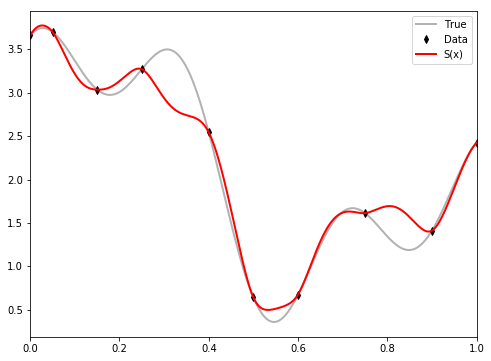

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

reload(sg)

# The test function
f = lambda x: np.sin(8*x) + 0.66*np.cos(18*x) + 3 - 2*x
# full resolution 
x = np.linspace(0,1,1001)
fx = f(x)
# sample locations
x_i = np.array([0.,0.05,0.15,0.25,0.4,0.5,0.6,0.75,0.9,1.0])
f_i = f(x_i)


# define a compact support kernel function
cpc2 = lambda r,d=1  :  0 if r>d  else (1-r/d)**4*(4*r/d+1)

# Assign a defined kernel function to the rbf object
S_k = sg.rbf(x_i,f_i,f=cpc2,epsilon=0.2)

#S_k.fit()
#S_k = sg.rbf(x_i,f_i,function='compact_support',epsilon=0.2)


print("\n << %s >> kernel function length scale = %.4f\n"%(S_k.function,S_k.epsilon))

# plot the true function and the sample locations
plt.figure(1,(8,6))
plt.plot(x  ,fx ,'k-',lw=2.,alpha=0.3,label='True');
plt.plot(x_i,f_i,'kd',ms=5,label='Data');
plt.plot(x  ,S_k(x) ,'r-',lw=2.,label=r'S(x)');
plt.xlim([0,1])
plt.legend();



$ $

$ $

$ $

## Indicators:

Supplementary indicators and uncertainty are further quantities that are very useful in fine-tuning the scalable parameters or developing an adaptive sampling strategy for example. The radius of influence or other scalable parameters may be fine-tuned without access to some  “true” underling function by the use of cross-validation and maximising the likelihood function while uncertainty or prediction error indicators are useful in developing an adaptive sampling strategy. 

### Cross Validation

In the absence of a true known or easily determined function, the RBF approximation may be fine tuned using cross-validation. The full set of data $f_i$ is first split into a “training” and “testing” set or multiple sets if a lot of data is available. Given a set of tunable parameter values, a model is constructed using the training set(s) and the errors calculated between interpolated and true validation values in the testing set(s). When limited data is available, a full “leave-one-out” cross validation is preferred. In this case $N$ different models are constructed where each $i^{th}$ model $S_i(\boldsymbol{x},\boldsymbol{\varepsilon})$ is constructed without one sample value $f_i$ at $\boldsymbol{x}_i$. The objective function given a specific set of scalable parameter values $\varepsilon$ is then 

\begin{equation}
f_\mathrm{obj}(\boldsymbol{\varepsilon}) = \sum_{i=1}^N || S_i(\boldsymbol{x}_i,\boldsymbol{\varepsilon}) - f_i || \tag{10}
\end{equation}

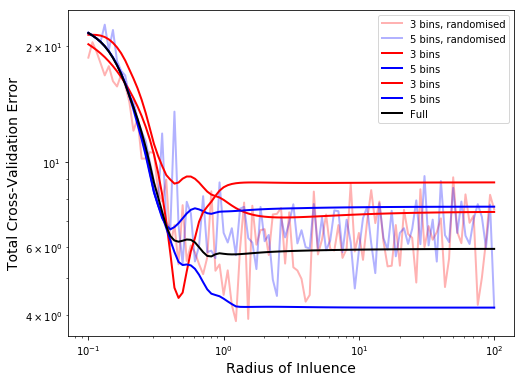

In [3]:
# 
# test for different kernel length scale values
dlist = np.logspace(-1,2,100)

# by default, the function calculates full "leave-one-out" cross validation
xve_full = np.array([S_k.cross_validate(d) for d in dlist])

# could also do it in smaller "bins" of randomised cross-validated sets of samples:
# create a "random list" to choose from
_ = S_k.cross_validate(randomise=True)
xve_30 = np.array([S_k.cross_validate(d,bins=3,randomise=False) for d in dlist])
xve_50 = np.array([S_k.cross_validate(d,bins=5,randomise=False) for d in dlist])
xve_3r = np.array([S_k.cross_validate(d,bins=3,randomise=True) for d in dlist])
xve_5r = np.array([S_k.cross_validate(d,bins=5,randomise=True) for d in dlist])
xve_31 = np.array([S_k.cross_validate(d,bins=3,randomise=False) for d in dlist])
xve_51 = np.array([S_k.cross_validate(d,bins=5,randomise=False) for d in dlist])



plt.figure(1,(8,6))
plt.plot(dlist,xve_3r,'r-',lw=2.,alpha=0.3,label='3 bins, randomised');
plt.plot(dlist,xve_5r,'b-',lw=2.,alpha=0.3,label='5 bins, randomised');
plt.plot(dlist,xve_30,'r-',lw=2.,label='3 bins');
plt.plot(dlist,xve_50,'b-',lw=2.,label='5 bins');
plt.plot(dlist,xve_31,'r-',lw=2.,label='3 bins');
plt.plot(dlist,xve_51,'b-',lw=2.,label='5 bins');
plt.plot(dlist,xve_full,'k-',lw=2.,label='Full');
plt.xscale('log');
plt.yscale('log');
plt.legend()
plt.xlabel('Radius of Inluence',fontsize=14);
plt.ylabel('Total Cross-Validation Error',fontsize=14);

In [4]:
#
# can also fit the best support radius using the "fit" function

eps0 = S_k.epsilon
from time import time


# Fit the kernel length scale:
t0 = time()
S_k.fit(using='cross-validate')
eps1,dt1 = S_k.epsilon, time()-t0

S_k.epsilon = eps0
t0 = time()
S_k.fit(using='cross-validate',bins=5)
eps2,dt2 = S_k.epsilon, time()-t0

S_k.epsilon = eps0
t0 = time()
S_k.fit(using='cross-validate',bins=3)
eps3,dt3 = S_k.epsilon, time()-t0



print("\n >>  Full cross-validation length scale = %.4f in %.4f sexonds"%(eps1,dt1))

print("\n >> 5 bin cross-validation length scale = %.4f in %.4f sexonds"%(eps2,dt2))

print("\n >> 3 bin cross-validation length scale = %.4f in %.4f sexonds"%(eps3,dt3))


 >>  Full cross-validation length scale = 0.7905 in 0.1390 sexonds

 >> 5 bin cross-validation length scale = 139.5313 in 0.0781 sexonds

 >> 3 bin cross-validation length scale = 0.4452 in 0.0407 sexonds



### Likelihood Function

The RBF approximation in Eq. (1) is as a result of a set of correlated random variables indexed by the $k$-dimensional input space of $\boldsymbol{x}$. It is therefore possible to inherit useful characteristics from stochastic process models such as the concept of a likelihood function:

\begin{equation}
\frac{1}{ (2\pi)^{N/2} (\sigma^2)^{N/2} |\boldsymbol{\Phi}| }
 \exp \left[ - \frac{ (\boldsymbol{f}-\mathbb{1} \mu )^\textsf{T} \boldsymbol{\Phi}^{-1} (\boldsymbol{f}-\mathbb{1} \mu ) }{ 2\sigma^2}  \right]\tag{11}
\end{equation}

where $\boldsymbol{f}$ is the vector of the observed function values $f_i$ and $\mathbb{1}$ is a vector of ones with the same length as the observations $N$. The scalable parameter dependence is captured via the correlation matrix $\boldsymbol{\Phi}$. For specific values of the scalable parameters, the mean  and variance  values that maximize the likelihood function is

\begin{equation}
\hat{\mu} = \frac{\mathbb{1}^\textsf{T}\boldsymbol{\Phi}^{-1} \boldsymbol{f}}{\mathbb{1}^\textsf{T}\boldsymbol{\Phi}^{-1} \mathbb{1}}\tag{12-a}
\end{equation}

and

\begin{equation}
\hat{\sigma}^2 = \frac{(\boldsymbol{f} - \mathbb{1}\hat{\mu})^\textsf{T} \boldsymbol{\Phi}^{-1}(\boldsymbol{f} - \mathbb{1}\hat{\mu}) }{N}.\tag{12-b}
\end{equation}



 >>  Full cross-validation length scale = 0.7905 in 0.1390 sexonds

 >> 5 bin cross-validation length scale = 139.5313 in 0.0781 sexonds

 >> 3 bin cross-validation length scale = 0.4452 in 0.0407 sexonds

 >> Maximum log likelihood length scale = 0.4172 in 0.0152 sexonds


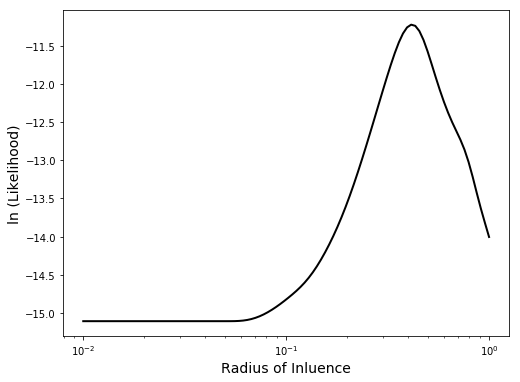

In [5]:
# 
# test for different kernel length scale values
dlist = np.logspace(-2,0,100)

# by default, the function calculates full "leave-one-out" cross validation
lle = np.array([S_k.log_likelihood(d) for d in dlist])

plt.figure(1,(8,6))
plt.plot(dlist,lle,'k-',lw=2.);
plt.xscale('log');
plt.xlabel('Radius of Inluence',fontsize=14);
plt.ylabel('ln (Likelihood)',fontsize=14);


# check time to optimise compared with cross-validation (default is likelihood estimate)
S_k.epsilon = eps0
t0 = time()
S_k.fit()  # <--- default is the maximum log likelihood function
eps4,dt4 = S_k.epsilon, time()-t0

print("\n >>  Full cross-validation length scale = %.4f in %.4f sexonds"%(eps1,dt1))
print("\n >> 5 bin cross-validation length scale = %.4f in %.4f sexonds"%(eps2,dt2))
print("\n >> 3 bin cross-validation length scale = %.4f in %.4f sexonds"%(eps3,dt3))
print("\n >> Maximum log likelihood length scale = %.4f in %.4f sexonds"%(eps4,dt4))



## Estimated prediction error

The error made in interpolating between known sample locations as a specific location of interest  is estimated by first considering $\boldsymbol{\varphi}$  a vector containing the correlation $\phi(\boldsymbol{x}, \boldsymbol{x}_k)$ to all centre locations  $\boldsymbol{x}_k$. Following the DACE approach, the mean squared error of the predicted interpolation value is estimated using

\begin{equation}
\varsigma^2 (\boldsymbol{x}) = \sigma^2 \left[ 1 - \boldsymbol{\varphi}^\textsf{T}\boldsymbol{\Phi}^{-1}\boldsymbol{\varphi}  + \frac{(1 - \mathbb{1}^\textsf{T}\boldsymbol{\Phi}^{-1}\boldsymbol{\varphi})^2}{\mathbb{1}^\textsf{T}\boldsymbol{\Phi}^{-1}\mathbb{1}
} \right]\tag{13}
\end{equation}

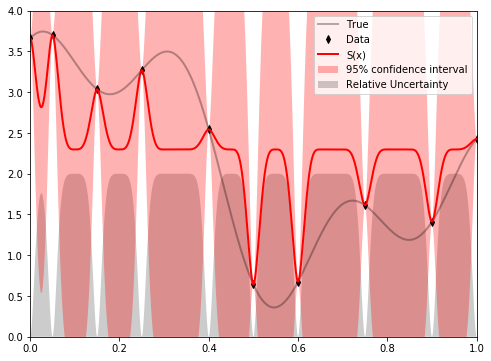

In [6]:
#
S_k._set_funct(function='gaussian',epsilon=0.05)
S_k._calc_weights()
#
#
S_mean, S_rmse = S_k(x,error=True)
#
#
# add the approximation to the previous plot
plt.figure(1,(8,6))
plt.plot(x  ,fx ,'k-',lw=2.,alpha=0.3,label='True');
plt.plot(x_i,f_i,'kd',ms=5,label='Data');
plt.plot(x  ,S_mean ,'r-',lw=2.,label=r'S(x)');
# approximate confidence interval
MS2 = S_mean - 1.9600*S_rmse
PS2 = S_mean + 1.9600*S_rmse
plt.fill(np.concatenate([x  ,  x[::-1]]), 
         np.concatenate([MS2,PS2[::-1]]),
         alpha=.3, fc='r', ec='None', label='95% confidence interval')
error2 = S_rmse-np.min(S_rmse)
error2/=np.max(error2)
plt.fill_between(x,2*error2,0,alpha=.2,facecolor='black', label='Relative Uncertainty')
plt.xlim([0,1])
plt.ylim([0,4])
plt.legend();


$ $

$ $

$ $

## Sharp Discontinuities

<<  WARNING  >>
		 Possible ill conditioning in covariance matrix while calculating kernel weights


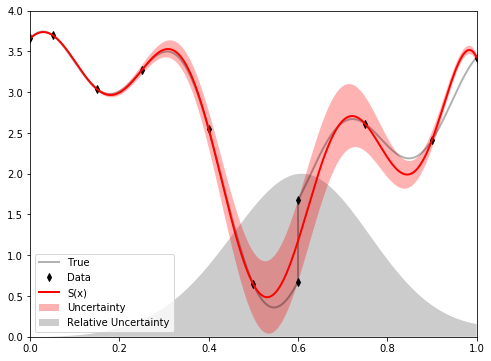

In [7]:

reload(sg)
# introduce a discontinuity into testfunction
f2 = lambda x: np.sin(8*x) + 0.66*np.cos(18*x) + 3 - 2*x +(x>0.6)*1
# full resolution 
x2 = np.r_[np.linspace(0,1,1001),0.6000001]
x2.sort(0)
fx2 = f2(x2)
# sample locations
x_i2 = np.array([0.,0.05,0.15,0.25,0.4,0.5,0.6,0.600001,0.75,0.9,1.0])
f_i2 = f2(x_i2)

S_k2 = sg.rbf(x_i2,
              f_i2,
              #function='compact_support',
              smooth=1e-8
             )
#
#S_k2 = sg.rbf(x_i2,f_i2,radial_tolerance=0.001)


S_mean2, S_rmse2 = S_k2(x,error=True)

error_sf = 0.5/np.max(S_rmse2)

MS2 = S_mean2 - error_sf*S_rmse2
PS2 = S_mean2 + error_sf*S_rmse2


# add the approximation to the previous plot
plt.figure(1,(8,6))
plt.plot(x2  ,fx2 ,'k-',lw=2.,alpha=0.3,label='True');
plt.plot(x_i2,f_i2,'kd',ms=5,label='Data');
plt.plot(x  ,S_k2(x) ,'r-',lw=2.,label=r'S(x)');
plt.fill(np.concatenate([x  ,  x[::-1]]), np.concatenate([MS2,PS2[::-1]]), alpha=.3, fc='r', ec='None', label='Uncertainty')
error2 = S_rmse2-np.min(S_rmse2)
error2/=np.max(error2)
plt.fill_between(x,2*error2,0,alpha=.2,facecolor='black', label='Relative Uncertainty')
plt.xlim([0,1])
plt.ylim([0,4])
plt.legend();


$ $

$ $

$ $

## Regression

If there is a lot of noise in the sample values or a smoother function approximation is desired, it is possible to rather perform a least squares RBF regression instead of solving the interpolation equations in Equation (9). In this case the number of samples locations (now $M$) is likely larger than the number of RBF centres $N$. Written as $\boldsymbol{A}  \times \boldsymbol{b}  = \boldsymbol{f} $ :


\begin{equation}
\begin{array}{c} 
\begin{bmatrix} \Phi_{11} & \cdots & \Phi_{1n} & 1 & x_1 & x_1^2 \\
 \vdots & \ddots & \vdots & \vdots & \vdots & \vdots \\
 \Phi_{m1} & \cdots & \Phi_{mn}  & 1 & x_m & x_m^2 \\
\end{bmatrix}
\begin{Bmatrix} \beta_1 \\ \vdots \\  \beta_n  \\ c_0 \\ c_1 \\c_2 \end{Bmatrix}
& = & \begin{Bmatrix}  f_1 \\ \vdots \\ f_m  \end{Bmatrix}
\end{array}\tag{14}
\end{equation}

For a number of sample points more than the number of chosen RBF centres and number of polynomial coefficients (in the 1D test-function case $M>N+3$), the coefficients are found as the least squares solution ($\boldsymbol{b}^*$) to the overdetermined system of equations in Eq. (14):

\begin{equation}
\boldsymbol{b}^* = (\boldsymbol{A}^\textsf{T} \boldsymbol{A})^{-1} \boldsymbol{A}^\textsf{T}  \boldsymbol{f}
\tag{15}
\end{equation}


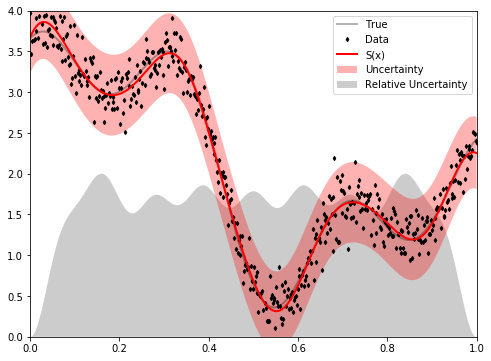

In [8]:
#
reload(sg)
#
#
npts = 500
x_j = np.linspace(0.,1,npts).reshape(-1,1)
f_j = f(x_j) + np.random.normal(0,0.2,npts).reshape(-1,1)

#
# kernel locations:
x_k = np.linspace(0.,1,10).reshape(-1,1)


S_k3 = sg.rbf(x_j,
              f_j,
              kernels=x_k,
             # function='compact_support'
              epsilon=0.1
             )

S_mean3, S_rmse3 = S_k3(x,error=True)

#S_rmse3 -= np.min(S_rmse3)

error_sf = 0.5/np.max(S_rmse3)

MS3 = S_mean3 - error_sf*S_rmse3
PS3 = S_mean3 + error_sf*S_rmse3


plt.figure(1,(8,6))
plt.plot(x  ,fx ,'k-',lw=2.,alpha=0.3,label='True');
plt.plot(x_j,f_j,'kd',ms=3,label='Data');
plt.plot(x  ,S_k3(x) ,'r-',lw=2.,label=r'S(x)');
plt.fill(np.concatenate([x  ,  x[::-1]]),np.concatenate([MS3,PS3[::-1]]),alpha=.3, fc='r', ec='None', label='Uncertainty')
error2 = S_rmse3-np.min(S_rmse3)
error2/=np.max(error2)
plt.fill_between(x,2*error2,0,alpha=.2,facecolor='black', label='Relative Uncertainty')
plt.xlim([0,1])
plt.ylim([0,4])
plt.legend();
